# Telecom Churn Prediction - ML Modelling and Prediction

- Baseline Model: Logistic Regression
- Random Forest
- Ada Boost
- Gradient Boost
- XG Boost


In [162]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [163]:
%cd /content/drive/MyDrive/Colab Notebooks/

/content/drive/MyDrive/Colab Notebooks


In [ ]:
__author__ = "Bing Huang"
__email__ = "Binghuang1990@gmail.com"

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
df_raw = pd.read_csv("telecom_cleaned.csv", index_col = 0)
df_raw.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
4528,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
6344,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6739,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
432,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No


In [166]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5976 entries, 1869 to 860
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5976 non-null   object 
 1   SeniorCitizen     5976 non-null   int64  
 2   Partner           5976 non-null   object 
 3   Dependents        5976 non-null   object 
 4   tenure            5976 non-null   int64  
 5   PhoneService      5976 non-null   object 
 6   MultipleLines     5976 non-null   object 
 7   InternetService   5976 non-null   object 
 8   OnlineSecurity    5976 non-null   object 
 9   OnlineBackup      5976 non-null   object 
 10  DeviceProtection  5976 non-null   object 
 11  TechSupport       5976 non-null   object 
 12  StreamingTV       5976 non-null   object 
 13  StreamingMovies   5976 non-null   object 
 14  Contract          5976 non-null   object 
 15  PaperlessBilling  5976 non-null   object 
 16  PaymentMethod     5976 non-null   object 
 17

In [167]:

df_raw['SeniorCitizen'] = df_raw['SeniorCitizen'].astype(str)


In [168]:
df = df_raw.copy()
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
4528,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
6344,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6739,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
432,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No


In [169]:
# check churn probability

df.Churn.value_counts(normalize = True)

,proportion
Churn,
No,0.734438
Yes,0.265562


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5976 entries, 1869 to 860
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5976 non-null   object 
 1   SeniorCitizen     5976 non-null   object 
 2   Partner           5976 non-null   object 
 3   Dependents        5976 non-null   object 
 4   tenure            5976 non-null   int64  
 5   PhoneService      5976 non-null   object 
 6   MultipleLines     5976 non-null   object 
 7   InternetService   5976 non-null   object 
 8   OnlineSecurity    5976 non-null   object 
 9   OnlineBackup      5976 non-null   object 
 10  DeviceProtection  5976 non-null   object 
 11  TechSupport       5976 non-null   object 
 12  StreamingTV       5976 non-null   object 
 13  StreamingMovies   5976 non-null   object 
 14  Contract          5976 non-null   object 
 15  PaperlessBilling  5976 non-null   object 
 16  PaymentMethod     5976 non-null   object 
 17

In [171]:
len(df.columns)

20

In [172]:
col_cat = df.select_dtypes(include = 'object').columns
col_num = df.select_dtypes(exclude = 'object').columns

In [173]:
len(col_cat)

17

In [174]:
col_num

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [175]:
len(col_num)

3

# ML Modelling

In [176]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")


### Split the data

In [177]:
X = df.drop('Churn', axis =1)
y = df.Churn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4482, 19), (1494, 19), (4482,), (1494,))

### Preprocess the data

In [178]:
# define the pipeline
features_cat = X_train.select_dtypes(include = 'object').columns.tolist()
features_num = X_train.select_dtypes(exclude = 'object').columns.tolist()

features_cat, features_num

(['gender',
  'SeniorCitizen',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod'],
 ['tenure', 'MonthlyCharges', 'TotalCharges'])

In [179]:
cat_transformer = Pipeline(steps=[
                                  ("onehot", OneHotEncoder(sparse_output=False,
                                                                   handle_unknown="ignore").set_output(transform="pandas"))
                                          ])

num_transformer = Pipeline(steps=[
                                  ("scaler", StandardScaler().set_output(transform="pandas"))
                                  ])

preprocessor = ColumnTransformer(transformers=[
                                  ("cat", cat_transformer, features_cat),
                                  ("num", num_transformer, features_num)
                                  ])
preprocessor

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['gender', 'SeniorCitizen', 'Partner',
                                  'Dependents', 'PhoneService', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod']),
                                ('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['tenure', 'MonthlyCharges', 'TotalCharges'])])

# Baseline model: Logistic Regression

In [180]:
lr_model = LogisticRegression(random_state=42, solver='liblinear')

pipeline_lr = Pipeline(steps=[
                              ("preprocess", preprocessor),
                              ("model", lr_model)
                              ])
pipeline_lr

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('model',
                 LogisticRegression(random_state=42, solver='liblinear'))])

In [181]:
# fit the data, make predictions,

pipeline_lr.fit(X_train, y_train)

y_pred_lr = pipeline_lr.predict(X_test)

y_pred_lr

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

### Check metrics - confusion_matrix, classification_report, f1_weighted

In [182]:
# 1. check confusion matrix
class_labels = pipeline_lr.named_steps['model'].classes_

pd.DataFrame(confusion_matrix(y_true = y_test, y_pred=y_pred_lr),
             columns = class_labels,
             index = class_labels)

,No,Yes
No,988,109
Yes,188,209


In [183]:
# 2. check classification_report
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

          No       0.84      0.90      0.87      1097
         Yes       0.66      0.53      0.58       397

    accuracy                           0.80      1494
   macro avg       0.75      0.71      0.73      1494
weighted avg       0.79      0.80      0.79      1494



In [240]:
# 3. f1 weighted score

f1_lr= f1_score(y_test, y_pred_lr, average='weighted')

print(f"weighted_f1 score of logistic regression model: {f1_lr:.2f}")

weighted_f1 score of logistic regression model: 0.79


In [241]:
# 4. f1_score(y_test, y_pred, average='weighted')

accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy of logistic regression model: {accuracy:.2f}")

Accuracy of logistic regression model: 0.80


# Random Forest

In [243]:
rf_model = RandomForestClassifier(random_state = 42)

pipeline_rf = Pipeline(steps=[
                              ("preprocess", preprocessor),
                              ("model", rf_model)
                              ])
pipeline_rf

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [244]:
pipeline_rf.fit(X_train, y_train)

y_pred_rf = pipeline_rf.predict(X_test)


### Check metrics - confusion_matrix, classification_report, f1_weighted

In [207]:
# 1. check confusion matrix
#class_labels = pipeline_rf.named_steps['model'].classes_

pd.DataFrame(confusion_matrix(y_true = y_test, y_pred=y_pred_rf),
             columns = ["predicted No", "predicted Yes"],
             index = ["Actual No", "Actual Yes"])

,predicted No,predicted Yes
Actual No,993,104
Actual Yes,211,186


In [208]:
# 2. check classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

          No       0.82      0.91      0.86      1097
         Yes       0.64      0.47      0.54       397

    accuracy                           0.79      1494
   macro avg       0.73      0.69      0.70      1494
weighted avg       0.78      0.79      0.78      1494



In [209]:
# 3. f1 weighted score

f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
print(f"weighted_f1 score of random forest model: {f1_rf:.2f}")


weighted_f1 score of random forest model: 0.78


In [210]:
# 4. f1_score(y_test, y_pred, average='weighted')

accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of Random Forest: {accuracy:.2f}")

Accuracy of Random Forest: 0.79


### Feature importance

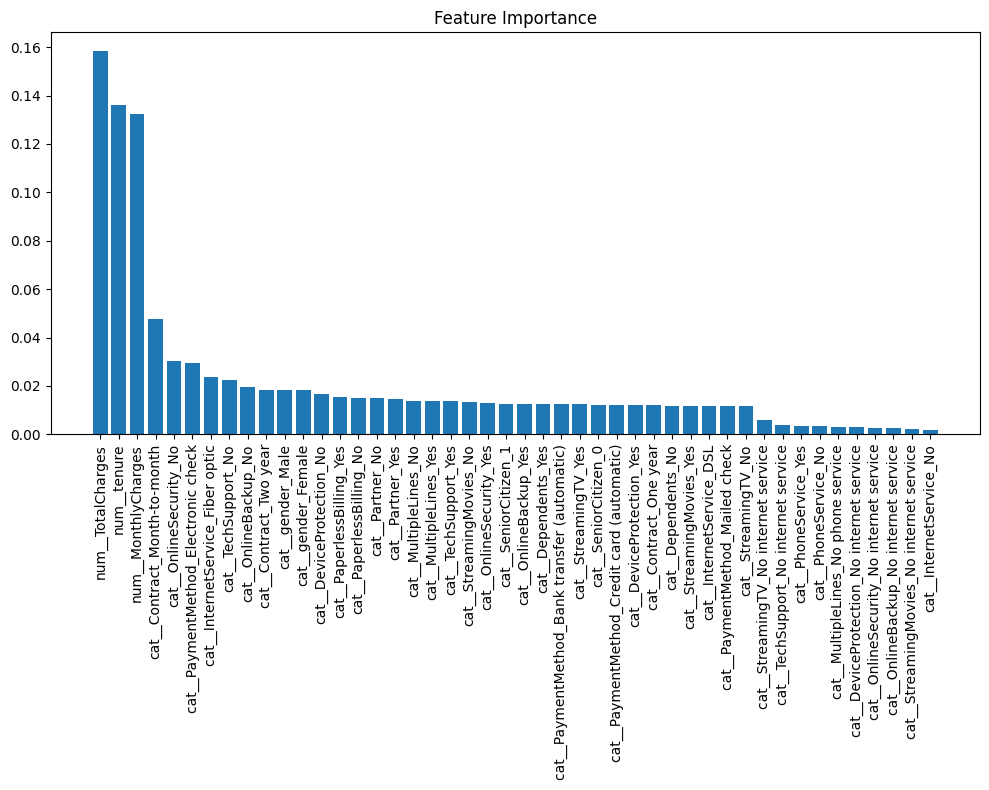

In [245]:

# After fitting the pipeline
pipeline_rf.fit(X_train, y_train)

# Access the trained RandomForestClassifier from the pipeline
rf_model_trained = pipeline_rf.named_steps['model']

# Get feature importances
importances = rf_model_trained.feature_importances_

# Access the feature names from the preprocessor
feature_names = pipeline_rf.named_steps['preprocess'].get_feature_names_out()

# Sort feature importances in descending order and get sorted indices
sorted_indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.bar(range(len(sorted_indices)), importances[sorted_indices], align='center')
plt.xticks(range(len(sorted_indices)), np.array(feature_names)[sorted_indices], rotation=90)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

Feature importance, as provided by feature_importances_, is specific to tree-based models, including:

- Decision Trees
- Random Forests
- Extra Trees
- Gradient Boosting Models (like XGBoost, LightGBM, CatBoost)

These models use tree-based structures, which allow them to measure how much each feature reduces impurity (e.g., Gini impurity or entropy) across all splits in the trees, which translates into the feature importance.

However, other types of models, such as linear models, you can check the coefficients

### Feature Selections

In [238]:
# Import SelectFromModel
from sklearn.feature_selection import SelectFromModel

# SelectFromModel
feature_selector_rf = SelectFromModel(rf_model, threshold='1*mean')  # Keep features with importance above threshold


# Pipeline with feature selection step + final model to be trained, here I am using Random forest

pipeline_rf = Pipeline(steps=[
                              ("preprocess", preprocessor), # Moved the preprocessor before feature selection
                              ('feature_selection', feature_selector_rf),
                              ("model", rf_model)
                              ])
pipeline_rf

pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)


In [239]:
f1_weighted_RF = round(f1_score(y_test, y_pred_rf, average='weighted') * 100, 3)
f1_weighted_RF

78.234

In [237]:
# Fit the pipeline
pipeline_rf.fit(X_train, y_train)

# Access the fitted feature selector from the pipeline
fitted_feature_selector = pipeline_rf.named_steps['feature_selection']

# Access the preprocessed data from the pipeline
preprocessed_data = pipeline_rf.named_steps['preprocess'].transform(X_train)

# Get the mask of selected features (after preprocessing)
selected_features_mask = fitted_feature_selector.get_support()

# Retrieve the names of the transformed features based on preprocessing step
# Assuming the preprocessor is a ColumnTransformer
# If you're using something like OneHotEncoder, it may expand certain columns
transformed_feature_names = pipeline_rf.named_steps['preprocess'].get_feature_names_out()

# Apply the mask to the transformed feature names to get the selected features
selected_feature_names = transformed_feature_names[selected_features_mask]
print(f"Selected Features: {list(selected_feature_names)}")


Selected Features: ['cat__InternetService_Fiber optic', 'cat__OnlineSecurity_No', 'cat__TechSupport_No', 'cat__Contract_Month-to-month', 'cat__PaymentMethod_Electronic check', 'num__tenure', 'num__MonthlyCharges', 'num__TotalCharges']



# Ada Boost model

In [211]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier(random_state=42)
ada_boost

AdaBoostClassifier(random_state=42)

In [212]:
pipeline_ada_boost = Pipeline([("pre_process", preprocessor),
                               ("model", ada_boost)])
pipeline_ada_boost

Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('model', AdaBoostClassifier(random_state=42))])

In [213]:
pipeline_ada_boost.fit(X_train, y_train)
y_pred_ad = pipeline_ada_boost.predict(X_test)

class_labels = pipeline_ada_boost.named_steps['model'].classes_

print(classification_report(y_test, y_pred_ad))

pd.DataFrame(confusion_matrix(y_test, y_pred_ad),
             columns=class_labels, index=class_labels)

              precision    recall  f1-score   support

          No       0.84      0.90      0.87      1097
         Yes       0.66      0.54      0.59       397

    accuracy                           0.80      1494
   macro avg       0.75      0.72      0.73      1494
weighted avg       0.80      0.80      0.80      1494



,No,Yes
No,988,109
Yes,183,214




# Gradient Boost

In [214]:
gbm = GradientBoostingClassifier(random_state=42)

pipeline_gbm = Pipeline([("pre_process", preprocessor),
                         ("model", gbm)])

pipeline_gbm.fit(X_train, y_train)
y_pred_gdm = pipeline_gbm.predict(X_test)

class_labels = pipeline_gbm.named_steps['model'].classes_

print(classification_report(y_test, y_pred_gdm))

pd.DataFrame(confusion_matrix(y_test, y_pred_gdm),
             columns=class_labels, index=class_labels)

              precision    recall  f1-score   support

          No       0.84      0.91      0.87      1097
         Yes       0.68      0.52      0.59       397

    accuracy                           0.81      1494
   macro avg       0.76      0.72      0.73      1494
weighted avg       0.80      0.81      0.80      1494



,No,Yes
No,998,99
Yes,190,207


# XGBoost

In [215]:
xgb = XGBClassifier(random_state=42)

pipeline_xgb = Pipeline([("pre_process", preprocessor),
                         ("model", xgb)])
pipeline_xgb


Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovie...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [216]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# transform y labels into 0 and 1 as latest xgboost version doesn't support string labels
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)

pipeline_xgb.fit(X_train, y_train_le)
y_pred_le = pipeline_xgb.predict(X_test)

In [217]:
y_pred = le.inverse_transform(y_pred_le)

In [218]:
class_labels = le.classes_

print(classification_report(y_test, y_pred))

pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=class_labels, index=class_labels)

              precision    recall  f1-score   support

          No       0.84      0.89      0.87      1097
         Yes       0.64      0.53      0.58       397

    accuracy                           0.80      1494
   macro avg       0.74      0.71      0.72      1494
weighted avg       0.79      0.80      0.79      1494



,No,Yes
No,980,117
Yes,188,209


The model performs better for the "No" class, while it struggles to identify the "Yes" class accurately, likely due to the imbalance in the data. You might want to try addressing this class imbalance by adjusting class weights or using techniques like SMOTE (Synthetic Minority Over-sampling Technique).